In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
miami = pd.read_excel('c:/Users/denis/Desktop/Ironhack/ironhackLabs/Transportation/Users_Monthly.xlsx')

In [20]:
miami.head()

,4 digit NTD ID,Agency,Active,Reporter Type,UZA Name,Modes,TOS,JAN02,FEB02,MAR02,APR02,MAY02,JUN02,JUL02,AUG02,SEP02,OCT02,NOV02,DEC02,JAN03,FEB03,MAR03,APR03,MAY03,JUN03,JUL03,AUG03,SEP03,OCT03,NOV03,DEC03,JAN04,FEB04,MAR04,APR04,MAY04,JUN04,JUL04,AUG04,SEP04,OCT04,NOV04,DEC04,JAN05,FEB05,MAR05,APR05,MAY05,JUN05,JUL05,AUG05,SEP05,OCT05,NOV05,DEC05,JAN06,FEB06,MAR06,APR06,MAY06,JUN06,JUL06,AUG06,SEP06,OCT06,NOV06,DEC06,JAN07,FEB07,MAR07,APR07,MAY07,JUN07,JUL07,AUG07,SEP07,OCT07,NOV07,DEC07,JAN08,FEB08,MAR08,APR08,MAY08,JUN08,JUL08,AUG08,SEP08,OCT08,NOV08,DEC08,JAN09,FEB09,MAR09,APR09,MAY09,JUN09,JUL09,AUG09,SEP09,OCT09,NOV09,DEC09,JAN10,FEB10,MAR10,APR10,MAY10,JUN10,JUL10,AUG10,SEP10,OCT10,NOV10,DEC10,JAN11,FEB11,MAR11,APR11,MAY11,JUN11,JUL11,AUG11,SEP11,OCT11,NOV11,DEC11,JAN12,FEB12,MAR12,APR12,MAY12,JUN12,JUL12,AUG12,SEP12,OCT12,NOV12,DEC12,JAN13,FEB13,MAR13,APR13,MAY13,JUN13,JUL13,AUG13,SEP13,OCT13,NOV13,DEC13,JAN14,FEB14,MAR14,APR14,MAY14,JUN14,JUL14,AUG14,SEP14,OCT14,NOV14,DEC14,JAN15,FEB15,MAR15,APR15,MAY15,JUN15,JUL15,AUG15,SEP15,OCT15,NOV15,DEC15,JAN16,FEB16,MAR16,APR16,MAY16,JUN16,JUL16,AUG16,SEP16,OCT16,NOV16,DEC16,JAN17,FEB17,MAR17,APR17,MAY17,JUN17,JUL17,AUG17,SEP17,OCT17,NOV17,DEC17,JAN18,FEB18,MAR18,APR18,MAY18,JUN18,JUL18,AUG18,SEP18,OCT18,NOV18,DEC18,JAN19,FEB19,MAR19,APR19,MAY19,JUN19,JUL19,AUG19,SEP19,OCT19,NOV19,DEC19,JAN20
780,4034,Miami-Dade Transit,Active,Full Reporter,"Miami, FL",Bus,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26316.0,26552.0,30787.0,31516.0,29441.0,32250.0,31467.0,32772.0,32053.0,33385.0,33397.0,31366.0,33150.0,32630.0,33599.0,33884.0,32283.0,34140.0,33495.0,32322.0,30719.0,31907.0,31830.0,29255.0,28798.0,29618.0,30506.0,32537.0,29488.0,31477.0,29140.0,31172.0,29403.0,29909.0,30186.0,13550.0,20298.0,22360.0,23441.0,23608.0,22351.0,24398.0,24788.0,24810.0,25618.0,27149.0,25410.0,25929.0,27260.0,26458.0,27220.0,29461.0,26454.0,28723.0,28547.0,28903.0,27244.0,27212.0,27247.0,23486.0,26837.0,26632.0,27570.0,28849.0
781,4034,Miami-Dade Transit,Active,Full Reporter,"Miami, FL",Bus,PT,86215.0,84902.0,91547.0,93075.0,95337.0,86869.0,91899.0,93032.0,90796.0,103417.0,90599.0,89128.0,81806.0,93072.0,117246.0,93971.0,118555.0,97981.0,92493.0,117205.0,98545.0,102268.0,120434.0,93134.0,104987.0,104832.0,114190.0,108635.0,107450.0,99163.0,108339.0,110864.0,104449.0,135866.0,104213.0,103500.0,125427.0,111464.0,111998.0,143627.0,115843.0,108907.0,135423.0,108800.0,109739.0,127749.0,110254.0,139576.0,116872.0,122774.0,126419.0,155652.0,127496.0,122219.0,149590.0,126617.0,151367.0,133711.0,147106.0,154738.0,123256.0,133533.0,170268.0,132301.0,133365.0,127239.0,126318.0,158004.0,159800.0,129487.0,123489.0,152224.0,115098.0,129485.0,162226.0,129380.0,161780.0,129972.0,123136.0,144123.0,122196.0,162377.0,122724.0,123745.0,124182.0,121518.0,129143.0,114186.0,123445.0,120613.0,112342.0,121523.0,133344.0,138222.0,125445.0,123135.0,118653.0,121652.0,138381.0,133854.0,129728.0,131844.0,127056.0,131852.0,133717.0,137417.0,129501.0,119648.0,127832.0,125639.0,141992.0,135881.0,137012.0,135500.0,126631.0,137207.0,138955.0,139730.0,136597.0,130079.0,137499.0,139292.0,146831.0,140397.0,147984.0,137645.0,138655.0,139472.0,138180.0,154621.0,140645.0,131574.0,143112.0,136713.0,144102.0,148182.0,147829.0,137192.0,142070.0,140531.0,141650.0,153704.0,134997.0,130639.0,136999.0,132611.0,141053.0,145869.0,144428.0,136444.0,140285.0,136585.0,142709.0,153078.0,129387.0

In [3]:
miami = miami[miami['UZA Name'] == 'Miami, FL']

In [9]:
miami['Agency'].value_counts()

Miami-Dade Transit                                                  8
Broward County Transit Division                                     5
Board of County Commissioners, Palm Beach County, PalmTran, Inc.    4
Broward County Community Bus Service                                2
South Florida Regional Transportation Authority                     2
City of Fort Lauderdale                                             2
Miami Lakes - vRide, Inc.                                           1
Name: Agency, dtype: int64

In [4]:
miami = miami[miami['Agency'] == 'Miami-Dade Transit']

In [6]:
miami_grouped = miami.groupby('Modes').sum()

In [5]:
miami = miami.drop(['5 digit NTD ID', 'UZA', 'Unnamed: 226'], axis=1)

In [7]:
miami_grouped.head()

,JAN02,FEB02,MAR02,APR02,MAY02,JUN02,JUL02,AUG02,SEP02,OCT02,NOV02,DEC02,JAN03,FEB03,MAR03,APR03,MAY03,JUN03,JUL03,AUG03,SEP03,OCT03,NOV03,DEC03,JAN04,FEB04,MAR04,APR04,MAY04,JUN04,JUL04,AUG04,SEP04,OCT04,NOV04,DEC04,JAN05,FEB05,MAR05,APR05,MAY05,JUN05,JUL05,AUG05,SEP05,OCT05,NOV05,DEC05,JAN06,FEB06,MAR06,APR06,MAY06,JUN06,JUL06,AUG06,SEP06,OCT06,NOV06,DEC06,JAN07,FEB07,MAR07,APR07,MAY07,JUN07,JUL07,AUG07,SEP07,OCT07,NOV07,DEC07,JAN08,FEB08,MAR08,APR08,MAY08,JUN08,JUL08,AUG08,SEP08,OCT08,NOV08,DEC08,JAN09,FEB09,MAR09,APR09,MAY09,JUN09,JUL09,AUG09,SEP09,OCT09,NOV09,DEC09,JAN10,FEB10,MAR10,APR10,MAY10,JUN10,JUL10,AUG10,SEP10,OCT10,NOV10,DEC10,JAN11,FEB11,MAR11,APR11,MAY11,JUN11,JUL11,AUG11,SEP11,OCT11,NOV11,DEC11,JAN12,FEB12,MAR12,APR12,MAY12,JUN12,JUL12,AUG12,SEP12,OCT12,NOV12,DEC12,JAN13,FEB13,MAR13,APR13,MAY13,JUN13,JUL13,AUG13,SEP13,OCT13,NOV13,DEC13,JAN14,FEB14,MAR14,APR14,MAY14,JUN14,JUL14,AUG14,SEP14,OCT14,NOV14,DEC14,JAN15,FEB15,MAR15,APR15,MAY15,JUN15,JUL15,AUG15,SEP15,OCT15,NOV15,DEC15,JAN16,FEB16,MAR16,APR16,MAY16,JUN16,JUL16,AUG16,SEP16,OCT16,NOV16,DEC16,JAN17,FEB17,MAR17,APR17,MAY17,JUN17,JUL17,AUG17,SEP17,OCT17,NOV17,DEC17,JAN18,FEB18,MAR18,APR18,MAY18,JUN18,JUL18,AUG18,SEP18,OCT18,NOV18,DEC18,JAN19,FEB19,MAR19,APR19,MAY19,JUN19,JUL19,AUG19,SEP19,OCT19,NOV19,DEC19,JAN20
Modes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bus,5512260.0,5212070.0,5584941.0,5485658.0,5526653.0,4868326.0,5318877.0,5456934.0,5268803.0,5833271.0,5214391.0,5230387.0,5395806.0,5710527.0,6003891.0,5476479.0,5570370.0,5212207.0,5560537.0,5431215.0,5549182.0,5989423.0,5487946.0,5517526.0,6117990.0,6040880.0,6708846.0,6766912.0,6371456.0,6384199.0,6658227.0,6587799.0,7025682.0,7415853.0,6711378.0,6850814.0,6703209.0,6458778.0,7189671.0,6738174.0,7135949.0,6145300.0,6257652.0,6524011.0,6689814.0,6289358.0,7072014.0,7155858.0,7233774.0,6720318.0,7680650.0,6972300.0,7188801.0,7073119.0,6615189.0,7096612.0,7063309.0,7450511.0,7012951.0,6922286.0,7225204.0,6780075.0,7650948.0,6934652.0,7223046.0,6723085.0,6714140.0,7194214.0,7209981.0,7601166.0,7119785.0,7044371.0,7122390.0,7040637.0,7347587.0,7253804.0,7449306.0,7149288.0,7526448.0,7122809.0,7490700.0,7167867.0,6522939.0,6608908.0,6563369.0,6349957.0,6839145.0,7212702.0,6294428.0,5884426.0,6040944.0,6069316.0,6105713.0,6151678.0,5669250.0,5827925.0,5728052.0,5709910.0,6435598.0,6165876.0,6117790.0,5952186.0,5913496.0,6034112.0,6139651.0,6528026.0,6263925.0,6042965.0,6335200.0,6257210.0,6995622.0,6581303.0,6604376.0,6366584.0,6151452.0,6519037.0,6671320.0,6658055.0,6713595.0,6617842.0,6769561.0,6649619.0,7155078.0,6610528.0,6717198.0,6279352.0,6345294.0,6537294.0,6447207.0,7179884.0,6792950.0,6546516.0,6798921.0,6580295.0,6986983.0,6869106.0,6741668.0,6177871.0,6407429.0,6753419.0,6649205.0,7299170.0,6556720.0,6551544.0,6653350.0,6451457.0,6810455.0,6742944.0,6577085.0,6017396.0,6284522.0,6425908.0,6540101.0,6912922.0,6118467.0,6461736.0,6470575.0,5904204.0,6802031.0,6273258.0,6044299.0,5747574.0,5891889.0,5873269.0,5908391.0,6238588.0,5647039.0,5805733.0,5580707.0,5633914.0,5903862.0,5698145.0,5564241.0,5310256.0,5132849.0,5342292.0,5325486.0,5086790.0,5348172.0,5356637.0,5250895.0,5077884.0,5473080.0,5062054.0,5270187.0,4756582.0,4702824.0,4961922.0,3669995.0,4862999.0,4665625.0,4517054.0,4488710.0,4385530.0,4727366.0,4548340.0,4471727.0,4193031.0,4263154.0,4522253.0,4222242.0,4760815.0,4430104.0,4255258.0,4383467.0,4172464.0,4459521.0,4489953.0,4531181.0,4003475.0,4282876.0,4298350.0,4152847.0,4711873.0,4384054.0,4309412.0,4512320.0
Rail,1551952.0,1494895.0,1613905.0,1583007.0,1587454.0,1453326.0,1603810.0,1591425.0,1527310.0,1777054.0,1714024.0,1651569.0,1665143.0,1671374.0,1699954.0,1747261.0,1706395.0,1721018.0,1837857.0,1809905.0,1889655.0,1905094.0,1736004.0,1693102.0,1868931.0,1844918.0,2064335.0,2022192.0,2087918.0,21230

In [8]:
miami_grouped = miami_grouped.T

In [27]:
string.replace("geeks", "Geeks"))  

Modes,Bus,Rail
JAN02,5512260.0,1551952.0
FEB02,5212070.0,1494895.0
MAR02,5584941.0,1613905.0
APR02,5485658.0,1583007.0
MAY02,5526653.0,1587454.0


In [9]:
miami_test = miami_grouped.reset_index()

In [10]:
miami_test = miami_test.rename(columns={"index": "Time"})

In [20]:
# year = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
# month = ['JAN', 'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

# for i in year:
#     for x in miami_test['Time']:
#         miami_test['Time'] = miami_test['Time'].str.replace(i,'20'+i)

In [21]:
# year = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
# for i in year:
#     print('20'+i)

In [18]:
miami_test['Time'] = pd.to_datetime(miami_test['Time'], format='%b%y')

In [90]:
miami_test.head()

Modes,Time,Bus,Rail
0,2002-01-01,5512260.0,1551952.0
1,2002-02-01,5212070.0,1494895.0
2,2002-03-01,5584941.0,1613905.0
3,2002-04-01,5485658.0,1583007.0
4,2002-05-01,5526653.0,1587454.0


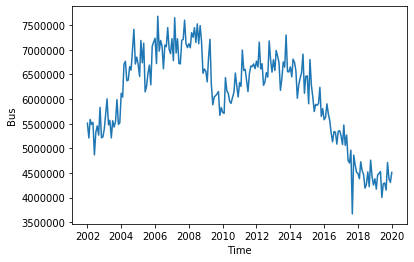

In [24]:
import seaborn as sns
ax = sns.lineplot(x="Time", y="Bus",data=miami_test)

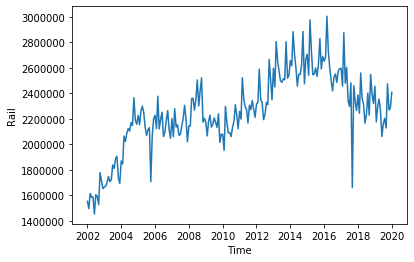

In [30]:
ax = sns.lineplot(x="Time", y="Rail",data=miami_test)

Note: Hurricane Irma occured Sept 2017, Wilma October 2005, and Katrina August 2005

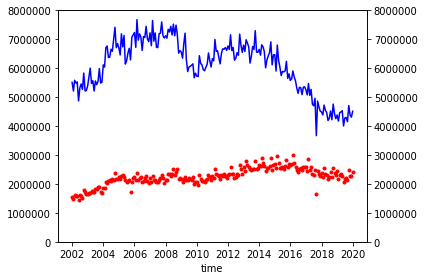

In [29]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
t = miami_test['Time']
y1 = miami_test['Bus']
ax1.plot(t, y1, 'b-')
ax1.set_xlabel('time')

ax2 = ax1.twinx()
y2 = miami_test['Rail']
ax2.plot(t, y2, 'r.')
a,b = 0,8000000
ax1.set_ylim(a,b)
ax2.set_ylim(a,b)

fig.tight_layout()
plt.show()

In [91]:
oneyear = miami_test[miami_test['Time'].dt.year == 2014]

In [77]:
oneyear = miami_test[miami_test['Time'].dt.year == 2002]

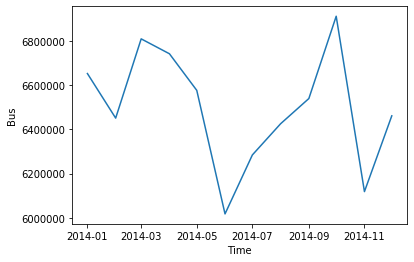

In [92]:
ax = sns.lineplot(x="Time", y="Bus",data=oneyear)

In [102]:
miami_test.describe()

Modes,Bus,Rail
count,217.00,217.00
mean,6076974.61,2260475.40
std,917762.07,303215.06
min,3669995.00,1453326.00
25%,5476479.00,2123075.00
50%,6273258.00,2264315.00
75%,6741668.00,2485634.00
max,7680650.00,3004914.00


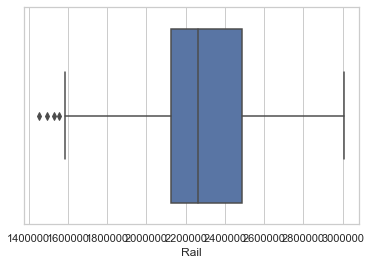

In [105]:
sns.set(style="whitegrid")
# Bus = sns.load_dataset("miami_test")
ax = sns.boxplot(x=miami_test["Rail"])

In [110]:
miami_test.to_excel(r'c:/Users/denis/Desktop/Ironhack/ironhackLabs/Transportation/Miami_Test.xlsx', index = False)

In [97]:
pd.options.display.float_format = '{:.2f}'.format

In [80]:
# ax = sns.lineplot(x="Time", y="Bus",data=oneyear)

In [79]:
# ax = sns.lineplot(x="Time", y="Bus",data=oneyear)